<a href="https://colab.research.google.com/github/gomlfx/DS-Unit-1-Sprint-2-Statistics/blob/master/Mike_Smith_LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [1]:
#imports 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data



--2019-11-18 02:38:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-11-18 02:38:12 (278 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [2]:
# make into a dataframe
column_headers = ['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid','religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration','synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [3]:
#recode votes as numeric
df = df.replace({'y':1,'n':0})
df.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [47]:
rep = df[df['party']=='republican']
print(rep.head(2))
dem = df[df['party']=='democrat']
print(dem.head(2))

        party  handicapped-infants  ...  duty-free  south-africa
0  republican                  0.0  ...        0.0           1.0
1  republican                  0.0  ...        0.0           NaN

[2 rows x 17 columns]
      party  handicapped-infants  water-project  ...  crime  duty-free  south-africa
2  democrat                  NaN            1.0  ...    1.0        0.0           0.0
3  democrat                  0.0            1.0  ...    0.0        0.0           1.0

[2 rows x 17 columns]


In [5]:
#remember to move NaN values from any column before counting for t-test
#use hypothesis testing: find an issue that democrats support more than republicans with p < 0.01
ttest_ind(dem['handicapped-infants'], rep['handicapped-infants'], nan_policy='omit')

Ttest_indResult(statistic=9.205264294809222, pvalue=1.613440327937243e-18)

In [0]:
#the small pvalue above invalidates null hypothesis

In [7]:
#nan values will be counted so remove before getting %.
dem_col = dem['handicapped-infants']
np.isnan(dem_col)
handicapped_infants_no_nans_dem = dem_col[~np.isnan(dem_col)] #means ~ will return any element not a nan
print(handicapped_infants_no_nans_dem.sum()) #as a count
print(handicapped_infants_no_nans_dem.sum()/len(handicapped_infants_no_nans_dem)) #as a %

156.0
0.6046511627906976


In [8]:
#do the same for rep
#nan values will be counted so remove before getting %.
rep_col = rep['handicapped-infants']
np.isnan(rep_col)
handicapped_infants_no_nans_rep = rep_col[~np.isnan(rep_col)] #means ~ will return any element not a nan
print(handicapped_infants_no_nans_rep.sum()) #as a count
print(handicapped_infants_no_nans_rep.sum()/len(handicapped_infants_no_nans_rep)) #as a %

31.0
0.18787878787878787


In [0]:
#in conclusion to the above, dems voted for that more and null hypothesis is invalid.

In [10]:
#Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
rep_col = rep['physician-fee-freeze']
np.isnan(rep_col)
col_no_nans_rep = rep_col[~np.isnan(rep_col)] #means ~ will return any element not a nan
print(col_no_nans_rep.sum()) #as a count
print(col_no_nans_rep.sum()/len(col_no_nans_rep)) #as a %

dem_col = dem['physician-fee-freeze']
np.isnan(dem_col)
col_no_nans_dem = dem_col[~np.isnan(dem_col)] #means ~ will return any element not a nan
print(col_no_nans_dem.sum()) #as a count
print(col_no_nans_dem.sum()/len(col_no_nans_dem)) #as a %

print(ttest_ind(dem['physician-fee-freeze'], rep['physician-fee-freeze'], nan_policy='omit'))

163.0
0.9878787878787879
14.0
0.05405405405405406
Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177)


In [11]:
#the above is a rep majority vote w/ pvalue > .05, no noise 
#Using hypothesis testing, find an issue where the difference between republicans
#and democrats has p > 0.1 (i.e. there may not be much of a difference)

rep_col = rep['mx-missile']
np.isnan(rep_col)
col_no_nans_rep = rep_col[~np.isnan(rep_col)] #means ~ will return any element not a nan
print(col_no_nans_rep.sum()) #as a count
print(col_no_nans_rep.sum()/len(col_no_nans_rep)) #as a %

dem_col = dem['mx-missile']
np.isnan(dem_col)
col_no_nans_dem = dem_col[~np.isnan(dem_col)] #means ~ will return any element not a nan
print(col_no_nans_dem.sum()) #as a count
print(col_no_nans_dem.sum()/len(col_no_nans_dem)) #as a %

Ttest_result = (ttest_ind(dem['immigration'], rep['immigration'], nan_policy='omit'))
print(Ttest_result)
print('{:.100f}'.format(Ttest_result.pvalue))

19.0
0.11515151515151516
188.0
0.7580645161290323
Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)
0.0833024849042506565499621729031787253916263580322265625000000000000000000000000000000000000000000000


In [0]:
#Water-project = .9 pvalue, immigration = .8 pvalue, this concludes the Assignment.

In [13]:
#use /len() to get value %
dem['handicapped-infants'].sum()/len(dem) #example how a line looks before nan removal

0.5842696629213483

In [14]:
rep['handicapped-infants'].sum()/len(rep) #example how a line looks before nan removal

0.18452380952380953

In [0]:
#////////lecture replication////////////not assignment////////////

In [0]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-18 02:38:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.3’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-11-18 02:38:15 (285 KB/s) - ‘house-votes-84.data.3’ saved [18171/18171]



In [18]:
# make into a dataframe
column_headers = ['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid','religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration','synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

df = pd.read_csv('house-votes-84.data', header=None, names=column_headers, na_values='?')

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [19]:
#recode votes as numeric
df = df.replace({'y':1,'n':0})
df.head(2)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [20]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [21]:
rep = df[df['party']=='republican']
len(rep)

168

In [22]:
dem = df[df['party']=='democrat']
len(dem)

267

In [23]:
rep['handicapped-infants'].sum()/len(rep)

0.18452380952380953

In [0]:
#remove nan values so they're not counted
col = rep['handicapped-infants']
np.isnan(col)

handicapped_infants_no_nans=col[~np.isnan(col)] #same col as before w/out NaN values 
# ~ = false

In [25]:
rep['handicapped-infants'].sum()/len(handicapped_infants_no_nans) #note diff w .sum()/len(rep)

0.18787878787878787

In [26]:
rep['handicapped-infants'].mean()

0.18787878787878787

In [27]:
rep['handicapped-infants'].mean()

0.18787878787878787

In [28]:
rep['water-project'].mean()

0.5067567567567568

In [29]:
dem['water-project'].mean()

0.502092050209205

In [30]:
#is population as whole split?
#compare with a t=test
ttest_ind(rep['water-project'], dem['water-project'])



Ttest_indResult(statistic=nan, pvalue=nan)

In [31]:
#strip nans from a column using nan_policy='omit'
#low statistic=, and high pvalue= means no difference in the two compared
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

In [0]:
#I choose a tolerance to reject null hypothesis using p-value <0.05
#since pvalue=0.9 there is no difference due to sampling or experimental error

In [0]:
from scipy.stats import ttest_1samp, ttest_ind

In [34]:
dem['south-africa'].mean() #93% support sa bill

0.9351351351351351

In [35]:
ttest_1samp(dem['south-africa'],1,nan_policy='omit') #threshold 100%

Ttest_1sampResult(statistic=-3.572534923600723, pvalue=0.0004513789099729073)

In [36]:
#change threshold
ttest_1samp(dem['south-africa'],.9,nan_policy='omit') #threshold 90%

Ttest_1sampResult(statistic=1.935123083617057, pvalue=0.05450836316336539)

In [37]:
ttest_1samp(dem['south-africa'],.9,nan_policy='omit')  #threshold 90%

Ttest_1sampResult(statistic=1.935123083617057, pvalue=0.05450836316336539)

In [38]:
ttest_1samp(dem['south-africa'], .899, nan_policy='omit')

Ttest_1sampResult(statistic=1.9901996636892347, pvalue=0.048049640325191705)

In [0]:
#.899 pvalue was less than .05, so I reject null hypothesis

In [40]:
#new problem, load wine dataset
from sklearn.datasets import load_wine
x = load_wine()
x.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [0]:
#put that into a DataFrame
import pandas as pd
wine = pd.DataFrame(x['data'], columns=x['feature_names'])
wine['origin']=x['target']

In [42]:
print(wine.shape)
wine.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,origin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


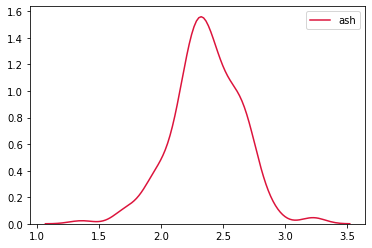

In [43]:
#examine a column. ash for all 3 origin groups
import seaborn as sns
sns.kdeplot(wine['ash'], color='crimson')

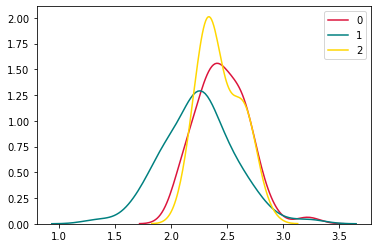

In [44]:
colorlist=['crimson','teal','gold']
for x in [0,1,2]:
  sns.kdeplot(wine[wine['origin']==x]['ash'],color=colorlist[x],label=x);

In [0]:
#hypothesis value
#'fail to reject' null hypothesis?


In [0]:
#Refactor your code into functions so it's easy to rerun with arbitrary variables
def issue_support (issue):
  t,p = ttest_ind(dem[issue], rep[issue], nan_policy='omit') 

  if p<.05:
        if t<0:
            print(f'the republicans support {issue} more than Dems')
        else:
            print(f'the dems support {issue} more than repubs')
  else:
        print(f'There is split interest in {issue}')
  print(t,p)
  #Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [46]:
issue_support('water-project')

There is split interest in water-project
-0.08896538137868286 0.9291556823993485
